## 05. forecast (시계열 분석)

1. 배경 및 설치

- fbprophet
    -  https://facebook.github.io/prophet/
- install
    - 윈도우 유저는 Visual C++ Build Tool을 먼저
    - https://go.microsoft.com/fwlink/?LinkId=691126
    - conda install pandas-datareader
    - conda install -c conda forge fbprophet
    - pip install fbprophet

------

## 함수(def)의 기초

In [2]:
def test_def(a, b):
    return a + b

In [3]:
c = test_def(2, 3)
c

5

- 가장 기초적인 모양의 def 정의 
- 이름(test_df)과 입력 인자(a, b)를 정해준다 
- 출력(return)을 작성

In [4]:
# 전역변수(global)
a = 1 

def edit_a(i):
    # 지역변수(local)
    global a 
    a = i 

In [5]:
edit_a(2)

In [6]:
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언

In [7]:
def edit_a(i):
    a = i 

In [8]:
edit_a(5)
print(a)

2


- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아니다

$$ y = asin(2\pi ft + t_0) + b $$

In [9]:
import matplotlib.pyplot as plt 
import numpy as np 
%matplotlib inline 

In [10]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

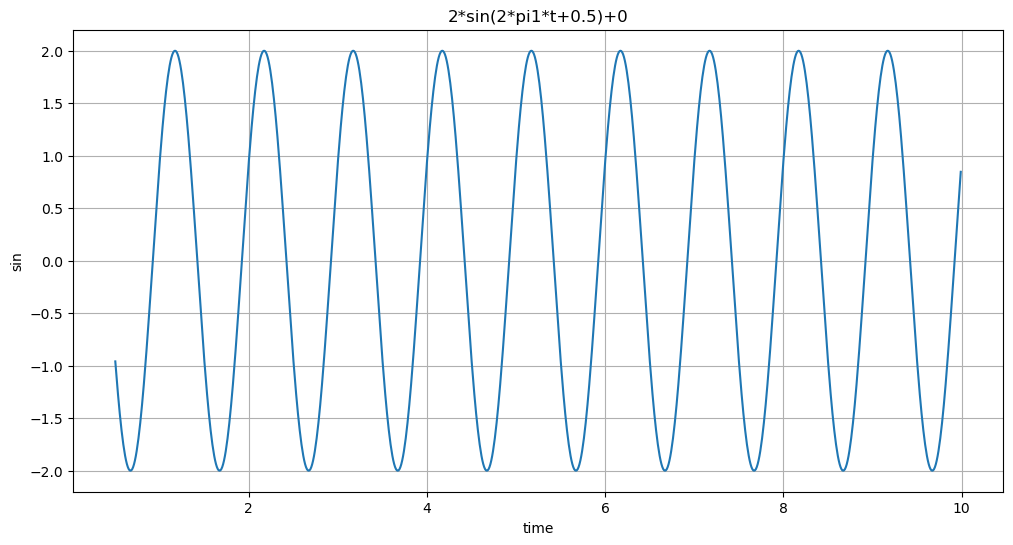

In [11]:
plotSinWave(2, 1, 10, 0.01, 0.5, 0)

In [12]:
def plotSinWave(**kwargs):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

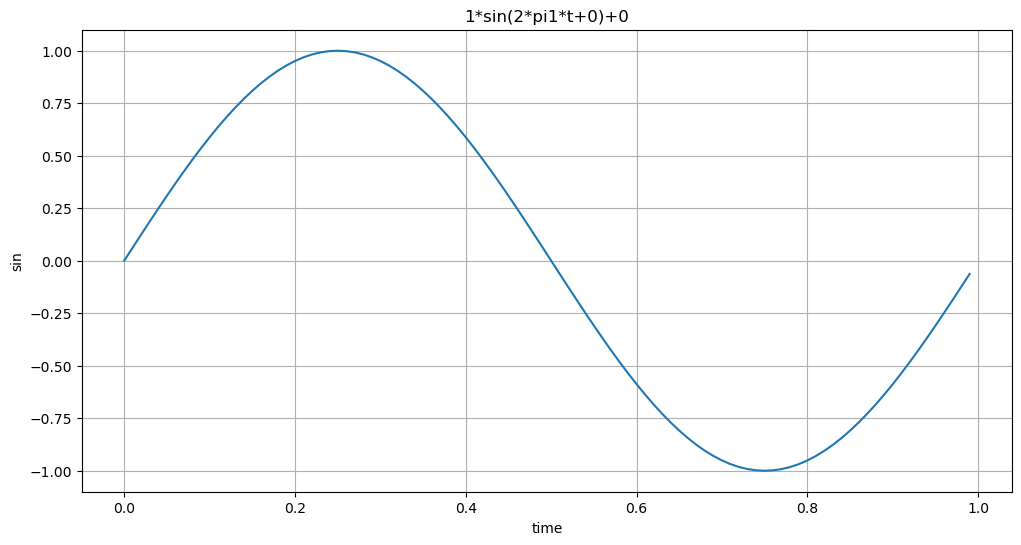

In [13]:
plotSinWave()

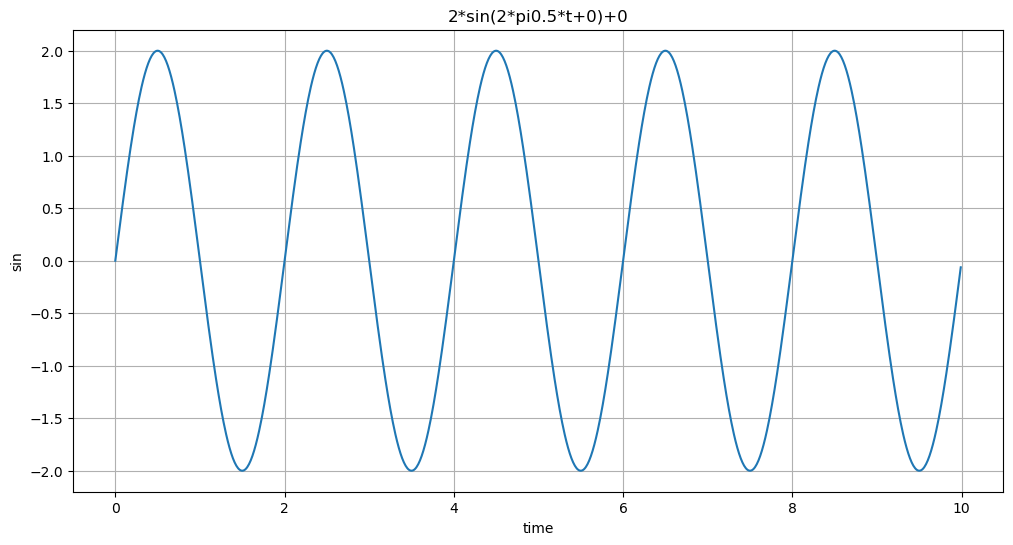

In [14]:
plotSinWave(amp=2, freq=0.5, endTime=10)

## 내가 만든 함수 import
- drawSinWave.py

In [15]:
%%writefile ./drawSinWave.py

import numpy as np 
import matplotlib.pyplot as plt 

def plotSinWave(**kwargs):
    """
    plot sine wave 
    y = a sin(2 pi f t + t_0) + b
    """
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime = kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12, 6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias 
    
    plt.figure(figsize=(12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()
    
if __name__ == "__main__":
    print("hello world~!!")
    print("this is test graph!!")
    plotSinWave(amp=1, endTime=2)

Writing ./drawSinWave.py


In [16]:
import drawSinWave as dS

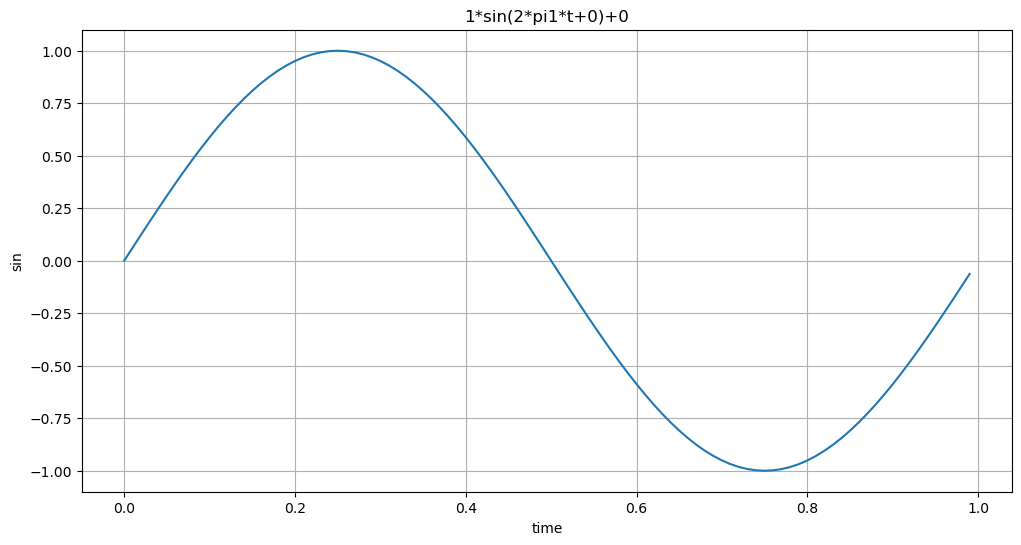

In [17]:
dS.plotSinWave()

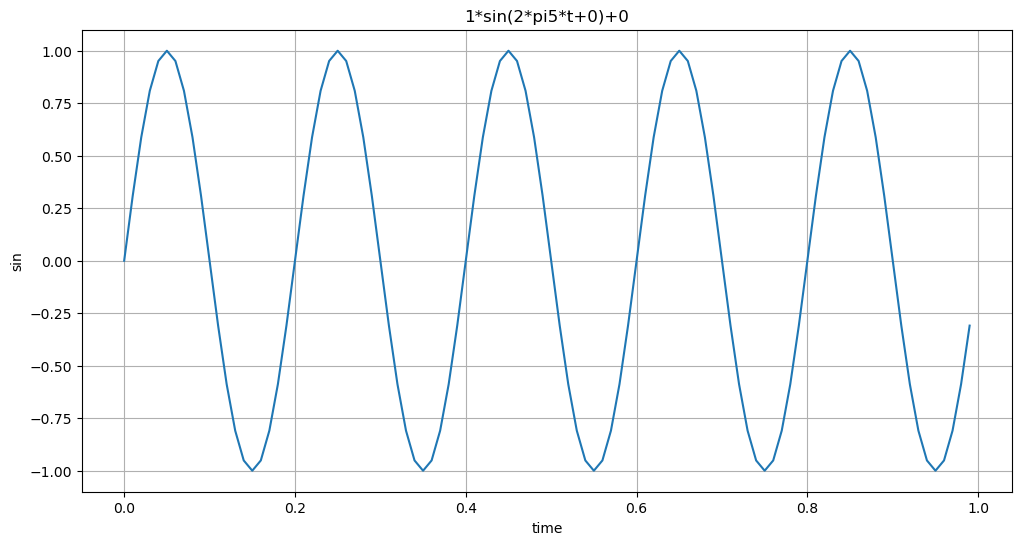

In [18]:
dS.plotSinWave(freq=5)

## 그래프 한글 설정

In [19]:
%%writefile ./set_matplotlib_hangul.py

import platform
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc

path = "c:/Windows/Fonts/malgun.ttf"

if platform.system() == "Darwin":
    print("Hangul OK in your MAC!!!")
    rc("font", family="Arial Unicode MS")
elif platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    print("Hangul OK in your Windows!!!")
    rc("font", family=font_name)
else:
    print("Unknown system.. sorry~~~")
    
plt.rcParams["axes.unicode_minus"] = False 

Writing ./set_matplotlib_hangul.py


In [20]:
import set_matplotlib_hangul

Hangul OK in your Windows!!!


Text(0.5, 1.0, '한글')

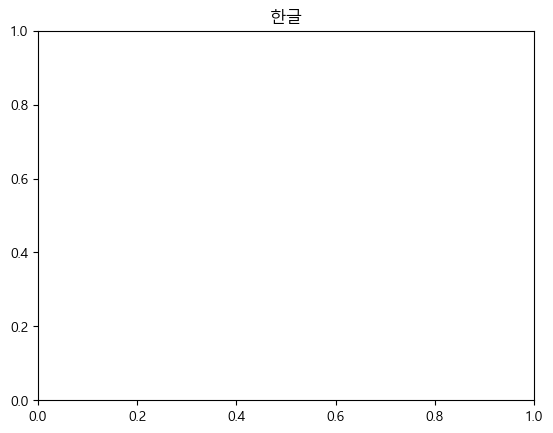

In [21]:
plt.title("한글")

## 2. Fbprophet 기초

In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [23]:
time = np.linspace(0, 1, 365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods=365*2, freq="D")
df = pd.DataFrame({"ds": ds, "y": result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


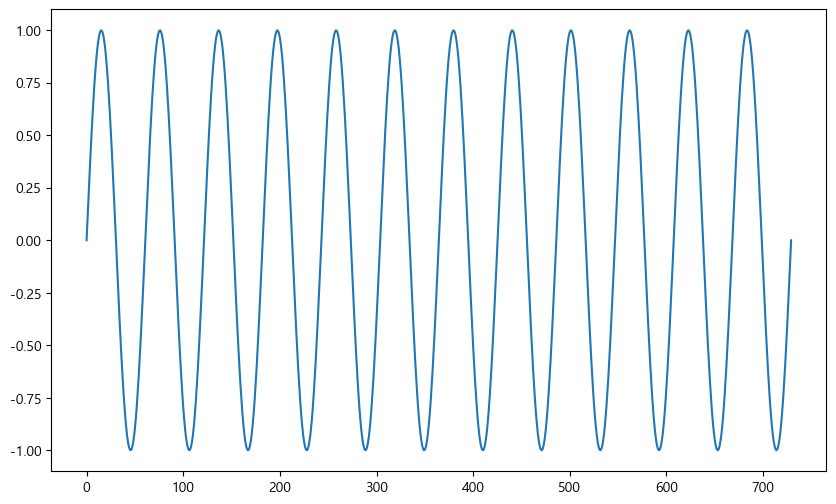

In [24]:
df["y"].plot(figsize=(10, 6));

In [27]:
from fbprophet import Prophet

m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df);

ModuleNotFoundError: No module named 'fbprophet'